In [1]:
pip install google-play-scraper

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install -qq google_play_scraper
!pip install -q transformers

In [3]:
import pandas as pd
import numpy as np
from google_play_scraper import app, Sort, reviews_all
import plotly.express as px

In [4]:
# Reviews_all Scrape the reviewid, username, content etc from the app page into a JSON format
Best_data = reviews_all('com.msorgdevelopers.bestdatanig',sleep_milliseconds=0, lang='en', country='NG', sort=Sort.NEWEST)

In [5]:
Best_data

[{'reviewId': '2830d8f5-244a-4199-aa7c-3d78e0f2e5df',
  'userName': 'folorunsho aanuoluwa',
  'userImage': 'https://play-lh.googleusercontent.com/a-/ALV-UjVl3Xb-km__1oVB1D6lOrC7VHLIuzNhpnpdcnh2t5ZqunuHc5w',
  'content': 'Perfect!!!',
  'score': 5,
  'thumbsUpCount': 0,
  'reviewCreatedVersion': '1.0.0',
  'at': datetime.datetime(2024, 12, 20, 10, 31, 6),
  'replyContent': None,
  'repliedAt': None,
  'appVersion': '1.0.0'},
 {'reviewId': '40fac89b-8e68-4176-a316-a38d78925f8e',
  'userName': 'Olarewaju raheemat',
  'userImage': 'https://play-lh.googleusercontent.com/a/ACg8ocIZOr2doSPhGPyBKB2jwi1F7Rrr0Nb3kspVFW9CBK8mOwQYpg=mo',
  'content': 'Olarewaju raheemat omobolale',
  'score': 5,
  'thumbsUpCount': 0,
  'reviewCreatedVersion': None,
  'at': datetime.datetime(2024, 12, 19, 17, 11, 16),
  'replyContent': None,
  'repliedAt': None,
  'appVersion': None},
 {'reviewId': '6c112bfc-9a12-4b3a-b090-1c16d5d64e97',
  'userName': 'Bilkisu Mustapaha',
  'userImage': 'https://play-lh.googleuserc

In [6]:
# convert the json data into a dataframe
Best_data_df = pd.json_normalize(Best_data)

In [7]:
Best_data_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,2830d8f5-244a-4199-aa7c-3d78e0f2e5df,folorunsho aanuoluwa,https://play-lh.googleusercontent.com/a-/ALV-U...,Perfect!!!,5,0,1.0.0,2024-12-20 10:31:06,None,NaT,1.0.0
1,40fac89b-8e68-4176-a316-a38d78925f8e,Olarewaju raheemat,https://play-lh.googleusercontent.com/a/ACg8oc...,Olarewaju raheemat omobolale,5,0,None,2024-12-19 17:11:16,None,NaT,None
2,6c112bfc-9a12-4b3a-b090-1c16d5d64e97,Bilkisu Mustapaha,https://play-lh.googleusercontent.com/a/ACg8oc...,Best app,5,0,None,2024-12-19 16:53:39,None,NaT,None
3,5712f2df-be4b-4a45-a65f-8cd49da6b423,Okafor Promise,https://play-lh.googleusercontent.com/a-/ALV-U...,"this is the most useless app, like customer se...",1,0,1.0.0,2024-12-19 10:39:26,None,NaT,1.0.0
4,e51abed4-3be3-4017-93b7-7d9a3ceab9b2,NWABUFOR ELOCHUKWU C.P Jr,https://play-lh.googleusercontent.com/a-/ALV-U...,Quick to debit the airtime but replied with. D...,1,0,None,2024-12-19 10:28:52,None,NaT,None


In [8]:
Best_data_df['score'].value_counts()

score
5    205
1    156
4     20
3     15
2     10
Name: count, dtype: int64

In [9]:
Best_data_df['score'].mean()

3.2660098522167487

In [10]:
Best_data_df.shape

(406, 11)

## Sentiment Analysis

In [12]:
# pip install --upgrade pip

In [13]:
# pip install torch torchvision torchaudio

In [14]:
# !pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

In [33]:
pip install tensorflow


  Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.18.0-cp312-cp312-win_amd64.whl.metadata (4.9 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached grpcio-1.68.1-cp312-cp312-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.7.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached ml_dtypes-0.4.1-cp312-cp312-win_amd64.whl.metadata (20 kB)
  Using

In [41]:
from transformers import pipeline

# Save the model locally
model_name = "siebert/sentiment-roberta-large-english"
save_path = "Downloads/Downloads/ETL_ELT"  # Directory to save the model

In [43]:
# Load the pipeline and save the model
sentiment_analysis = pipeline("sentiment-analysis", model=model_name)
sentiment_analysis.save_pretrained(save_path)

# Reuse the saved model
sentiment_analysis_reuse = pipeline("sentiment-analysis", model=save_path)

Device set to use cpu
Device set to use cpu


In [18]:
# Test the reused model
# play with the parameter and see if it works

result = sentiment_analysis_reuse("I am really enjoying this")
print(result)

[{'label': 'POSITIVE', 'score': 0.9989049434661865}]


In [19]:
#removing wildcharacter and cleaning the content column by casting to a str
Best_data_df['content_new']= Best_data_df['content'].astype('str')

In [20]:
Best_data_df['result'] = Best_data_df['content_new'].apply(lambda x: sentiment_analysis_reuse(x))

In [21]:
Best_data_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,content_new,result
0,2830d8f5-244a-4199-aa7c-3d78e0f2e5df,folorunsho aanuoluwa,https://play-lh.googleusercontent.com/a-/ALV-U...,Perfect!!!,5,0,1.0.0,2024-12-20 10:31:06,None,NaT,1.0.0,Perfect!!!,"[{'label': 'POSITIVE', 'score': 0.998649060726..."
1,40fac89b-8e68-4176-a316-a38d78925f8e,Olarewaju raheemat,https://play-lh.googleusercontent.com/a/ACg8oc...,Olarewaju raheemat omobolale,5,0,None,2024-12-19 17:11:16,None,NaT,None,Olarewaju raheemat omobolale,"[{'label': 'POSITIVE', 'score': 0.979775905609..."
2,6c112bfc-9a12-4b3a-b090-1c16d5d64e97,Bilkisu Mustapaha,https://play-lh.googleusercontent.com/a/ACg8oc...,Best app,5,0,None,2024-12-19 16:53:39,None,NaT,None,Best app,"[{'label': 'POSITIVE', 'score': 0.998151600360..."
3,5712f2df-be4b-4a45-a65f-8cd49da6b423,Okafor Promise,https://play-lh.googleusercontent.com/a-/ALV-U...,"this is the most useless app, like customer se...",1,0,1.0.0,2024-12-19 10:39:26,None,NaT,1.0.0,"this is the most useless app, like customer se...","[{'label': 'NEGATIVE', 'score': 0.999507308006..."
4,e51abed4-3be3-4017-93b7-7d9a3ceab9b2,NWABUFOR ELOCHUKWU C.P Jr,https://play-lh.googleusercontent.com/a-/ALV-U...,Quick to debit the airtime but replied with. D...,1,0,None,2024-12-19 10:28:52,None,NaT,None,Quick to debit the airtime but replied with. D...,"[{'label': 'NEGATIVE', 'score': 0.999503135681..."


In [22]:
# spliting the result into sentiment and score
Best_data_df['sentiment'] = Best_data_df['result'].apply(lambda x: (x[0]['label']))
Best_data_df['score'] = Best_data_df['result'].apply(lambda x: (x[0]['score']))

In [23]:
Best_data_df[['content','score','sentiment']]

,content,score,sentiment
0,Perfect!!!,0.998649,POSITIVE
1,Olarewaju raheemat omobolale,0.979776,POSITIVE
2,Best app,0.998152,POSITIVE
3,"this is the most useless app, like customer se...",0.999507,NEGATIVE
4,Quick to debit the airtime but replied with. D...,0.999503,NEGATIVE
...,...,...,...
401,Perfect,0.998544,POSITIVE
402,It's Easy to use and Stress-free and reliable,0.998923,POSITIVE
403,Excellent,0.998581,POSITIVE
404,Besrdatang is the best,0.998211,POSITIVE


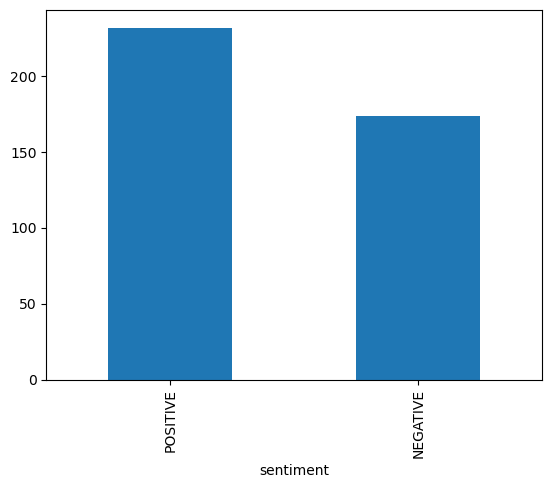

In [24]:
Best_data_df['sentiment'].value_counts().plot(kind='bar');

## Topic modeling

In [26]:
#generate a series for the reviews
feature_google=Best_data_df['content']
print(feature_google.size)
feature_google.head()

406


0                                           Perfect!!!
1                         Olarewaju raheemat omobolale
2                                             Best app
3    this is the most useless app, like customer se...
4    Quick to debit the airtime but replied with. D...
Name: content, dtype: object

In [45]:
pip install textblob


   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/626.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/626.3 kB ? eta -:--:--
   ------------------------------- ------ 524.3/626.3 kB 599.9 kB/s eta 0:00:01
   ------------------------------- ------ 524.3/626.3 kB 599.9 kB/s eta 0:00:01
   ------------------------------- ------ 524.3/626.3 kB 599.9 kB/s eta 0:00:01
   ------------------------------- ------ 524.3/626.3 kB 599.9 kB/s eta 0:00:01
   ------------------------------- ------ 524.3/626.3 kB 599.9 kB/s eta 0:00:01
   ------------------------------- ------ 524.3/626.3 kB 599.9 kB/s eta 0:00:01
   ------------------------------- ------ 524.3/626.3 kB 599.9 kB/s eta 0:00:01
   ------------------------------- ------ 524.3/626.3 kB 599.9 kB/s eta 0:00:01


In [47]:
# Import the necessary libraries
from textblob import TextBlob


# Define a function to translate the text to English
def translate_to_en(text):
    blob = TextBlob(str(text))
    try:
        return str(blob.translate(to='en'))
    except:
        return str(text)

# Apply the translate_to_en function to the 'review' column of the DataFrame
feature_google = feature_google.apply(translate_to_en)

# Print the top 5 rows of the DataFrame with the new 'review_en' column
print(feature_google.head())

0                                           Perfect!!!
1                         Olarewaju raheemat omobolale
2                                             Best app
3    this is the most useless app, like customer se...
4    Quick to debit the airtime but replied with. D...
Name: content, dtype: object


In [49]:
!pip install bertopic

   ---------------------------------------- 0.0/726.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/726.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/726.2 kB ? eta -:--:--
   -------------- ------------------------- 262.1/726.2 kB ? eta -:--:--
   -------------- ------------------------- 262.1/726.2 kB ? eta -:--:--
   -------------- ------------------------- 262.1/726.2 kB ? eta -:--:--
   -------------- ------------------------- 262.1/726.2 kB ? eta -:--:--
   --------------------------- ---------- 524.3/726.2 kB 356.7 kB/s eta 0:00:01
   --------------------------- ---------- 524.3/726.2 kB 356.7 kB/s eta 0:00:01
   --------------------------- ---------- 524.3/726.2 kB 356.7 kB/s eta 0:00:01
   --------------------------- ---------- 524.3/726.2 kB 356.7 kB/s eta 0:00:01
   -------------------------------------- 726.2/726.2 kB 270.0 kB/s eta 0:00:00


In [51]:
from bertopic import BERTopic

topic_model = BERTopic()
topics, probs = topic_model.fit_transform(feature_google.
                                   astype(str))

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [53]:
topic_model.get_topic_info().head(10)

,Topic,Count,Name,Representation,Representative_Docs
0,0,249,0_the_app_to_data,"[the, app, to, data, is, and, it, my, this, you]","[This is the best app I have ever use,the data..."
1,1,103,1_app_good_and_very,"[app, good, and, very, fast, to, the, is, this...","[Very good app, Very good app, Very good app]"
2,2,54,2_good_best_awesome_excellent,"[good, best, awesome, excellent, great, perfec...","[Good, Good, Good]"


In [55]:
Best_data_df.columns

Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'appVersion', 'content_new', 'result', 'sentiment'],
      dtype='object')

In [57]:
# the data to excel
output_file = 'playstore_reviews.xlsx'
Best_data_df.to_excel(output_file, index=False)

In [59]:
pip install mysql-connector-python --upgrade


   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
    --------------------------------------- 0.3/16.1 MB ? eta -:--:--
    --------------------------------------- 0.3/16.1 MB ? eta -:--:--
    --------------------------------------- 0.3/16.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/16.1 MB 390.1 kB/s eta 0:00:40
   - -------------------------------------- 0.5/16.1 MB 390.1 kB/s eta 0:00:40
   - -------------------------------------- 0.5/16.1 MB 390.1 kB/s eta 0:00:40
   - -------------------------------------- 0.5/16.1 MB 390.1 kB/s eta 0:00:40
   - -------------------------------------- 0.8/16.1 MB 353.3 kB/s eta 0:00:44
   - -------------------------------------- 0.8/16.1 MB 353.3 kB/s eta 0:00:44
   - -------------------------------------- 0.8/16.1 MB 353.3 kB/s eta 0:00:44
   -- --------------------

# ETL code

In [61]:
dataframe = Best_data_df

In [63]:
data = [tuple(row) for row in Best_data_df.to_numpy()]

In [65]:
# Check if any column contains lists
for col in dataframe.columns:
    if dataframe[col].apply(lambda x: isinstance(x, list)).any():
        print(f"Column '{col}' contains list values.")

Column 'result' contains list values.


In [67]:
# Flatten lists into comma-separated strings
for col in dataframe.columns:
    dataframe[col] = dataframe[col].apply(
        lambda x: ', '.join(map(str, x)) if isinstance(x, list) else x
    )

In [69]:
# Replace NaN with None
dataframe = dataframe.where(pd.notnull(dataframe), None)

In [81]:
import mysql.connector
import pandas as pd

DB_CONFIG = {
    'host': 'localhost',
    'user': 'root',
    'password': 'sqlpword',
    'database': 'playstore_reviews'
}

def create_connection():
    try:
        conn = mysql.connector.connect(**DB_CONFIG)
        print("Connected to MySQL Database!")
        return conn
    except mysql.connector.Error as err:
        if err.errno == 1049:
            print(f"Database '{DB_CONFIG['database']}' does not exist. Creating it...")
            temp_config = DB_CONFIG.copy()
            temp_config.pop('database')
            conn = mysql.connector.connect(**temp_config)
            cursor = conn.cursor()
            cursor.execute(f"CREATE DATABASE {DB_CONFIG['database']}")
            print(f"Database '{DB_CONFIG['database']}' created successfully!")
            cursor.close()
            conn.close()
            conn = mysql.connector.connect(**DB_CONFIG)
            return conn
        else:
            print(f"Error: {err}")
            return None

def infer_mysql_data_type(dtype, column_name=None):
    if column_name == "reviewId":  # Ensure `reviewId` is always VARCHAR(255)
        return "VARCHAR(255)"
    elif pd.api.types.is_integer_dtype(dtype):
        return "INT"
    elif pd.api.types.is_float_dtype(dtype):
        return "FLOAT"
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return "DATETIME"
    else:
        return "TEXT"

def create_table_from_dataframe(cursor, df, table_name):
    columns_with_types = []
    for col in df.columns:
        dtype = df[col].dtype
        mysql_type = infer_mysql_data_type(dtype, column_name=col)
        columns_with_types.append(f"`{col}` {mysql_type}")

    create_table_query = f"""
    CREATE TABLE IF NOT EXISTS `{table_name}` (
        {", ".join(columns_with_types)},
        PRIMARY KEY (`reviewId`)
    )
    """
    cursor.execute(create_table_query)
    print(f"Table `{table_name}` created successfully!")

def insert_data_from_dataframe(cursor, conn, df, table_name):
    columns = ", ".join([f"`{col}`" for col in df.columns])
    placeholders = ", ".join(["%s"] * len(df.columns))
    insert_query = f"""
    INSERT INTO `{table_name}` ({columns})
    VALUES ({placeholders})
    ON DUPLICATE KEY UPDATE {", ".join([f"`{col}` = VALUES(`{col}`)" for col in df.columns])}
    """

    for col in df.columns:
        df[col] = df[col].apply(
            lambda x: ', '.join(map(str, x)) if isinstance(x, list) else x
        )
    df = df.where(pd.notnull(df), None)

    data = [tuple(row) for row in df.to_numpy()]
    cursor.executemany(insert_query, data)
    conn.commit()
    print(f"{cursor.rowcount} rows inserted/updated successfully!")

def main():
    conn = create_connection()
    if conn is None:
        print("Failed to connect to the database. Exiting.")
        return

    cursor = conn.cursor()

    global dataframe
    if 'dataframe' not in globals():
        print("DataFrame `dataframe` is not defined. Exiting.")
        return

    datetime_columns = ['at', 'repliedAt']
    for col in datetime_columns:
        if col in dataframe.columns:
            dataframe[col] = pd.to_datetime(dataframe[col], errors='coerce')

    table_name = "playstore_reviews"
    create_table_from_dataframe(cursor, dataframe, table_name)
    insert_data_from_dataframe(cursor, conn, dataframe, table_name)

    cursor.close()
    conn.close()
    print("MySQL connection closed.")

if __name__ == "__main__":
    dataframe = dataframe

    main()

Database 'playstore_reviews' does not exist. Creating it...
Database 'playstore_reviews' created successfully!
Table `playstore_reviews` created successfully!
406 rows inserted/updated successfully!
MySQL connection closed.
